In [1]:
import os

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from patsy import dmatrices
import scipy.stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [2]:
data_file = os.path.join('..', 'github_data.csv')
data = pd.read_csv(data_file)

In [3]:
data['giniXavg_min_path'] = data['gini_coefficient'] * data['avg_min_path']
data['giniXclustering'] = data['gini_coefficient'] * data['avg_clustering']
data['clusteringXavg_min_path'] = data['avg_clustering'] * data['avg_min_path']

data['giniXavg_min_pathXcrowd_pct'] = data['gini_coefficient'] * data['avg_min_path'] * data['crowd_pct']
data['giniXclusteringXcrowd_pct'] = data['gini_coefficient'] * data['avg_clustering'] * data['crowd_pct']
data['clusteringXavg_min_pathXcrowd_pct'] = data['avg_clustering'] * data['avg_min_path'] * data['crowd_pct']

data['avg_clustering_2'] = data['avg_clustering']**2
data['avg_min_path_2'] = data['avg_min_path']**2
data['gini_coefficient_2'] = data['gini_coefficient']**2

data['crowd_pct_3'] = data['crowd_pct']**3

In [4]:
def add_cross_terms(df, crowd_pct):
    df = df.copy()
    
    df['crowd_pct'] = crowd_pct
    df['crowd_pct_2'] = crowd_pct**2
    
    df['giniXcrowd_pct'] = df['gini_coefficient'] * df['crowd_pct']
    df['avg_clusteringXcrowd_pct'] = df['avg_clustering'] * df['crowd_pct']
    df['avg_min_pathXcrowd_pct'] = df['avg_min_path'] * df['crowd_pct']
    
    df['giniXavg_min_pathXcrowd_pct'] = df['gini_coefficient'] * df['avg_min_path'] * df['crowd_pct']
    df['giniXclusteringXcrowd_pct'] = df['gini_coefficient'] * df['avg_clustering'] * df['crowd_pct']
    df['clusteringXavg_min_pathXcrowd_pct'] = df['avg_clustering'] * df['avg_min_path'] * df['crowd_pct']
    
    return df

## Read in Regression Models

In [5]:
volume_formula = """
issues_over_time ~ crowd_pct + crowd_pct_2 + avg_clustering + 
    gini_coefficient + avg_clusteringXcrowd_pct + 
    avg_min_pathXcrowd_pct  + total_contributors + 
    project_age
"""
y, X = dmatrices(volume_formula,
                 data=data, return_type='dataframe')
mod = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.log))
issue_volume_res = mod.fit()
print(1 - (issue_volume_res.deviance/issue_volume_res.null_deviance))
print(issue_volume_res.summary())

0.6559281199095996
                 Generalized Linear Model Regression Results                  
Dep. Variable:       issues_over_time   No. Observations:                  562
Model:                            GLM   Df Residuals:                      553
Model Family:                   Gamma   Df Model:                            8
Link Function:                    log   Scale:                         0.39390
Method:                          IRLS   Log-Likelihood:                -1277.1
Date:                Wed, 17 Feb 2021   Deviance:                       168.43
Time:                        22:39:38   Pearson chi2:                     218.
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Inter

<ipython-input-5-c0c12f41b4a1>:9: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  mod = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.log))


In [6]:
comment_formula = """
avg_comments ~ crowd_pct + crowd_pct_2  +  crowd_pct_3 +
    avg_min_pathXcrowd_pct + giniXavg_min_path + giniXclustering + clusteringXavg_min_path + 
    giniXavg_min_pathXcrowd_pct + giniXclusteringXcrowd_pct + clusteringXavg_min_pathXcrowd_pct +
    + avg_first_comment + avg_active_time + avg_clustering_2 + avg_min_path_2 + gini_coefficient_2  +
     + topic_2 + topic_5  + topic_13 + topic_18 + topic_2:topic_10
"""
y, X = dmatrices(comment_formula, data=data, return_type='dataframe')
mod = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.log))
avg_comments_res = mod.fit()
print(1 - (avg_comments_res.deviance/avg_comments_res.null_deviance))
print(avg_comments_res.summary())

0.5037559481783918
                 Generalized Linear Model Regression Results                  
Dep. Variable:           avg_comments   No. Observations:                  562
Model:                            GLM   Df Residuals:                      541
Model Family:                   Gamma   Df Model:                           20
Link Function:                    log   Scale:                        0.040305
Method:                          IRLS   Log-Likelihood:                -575.95
Date:                Wed, 17 Feb 2021   Deviance:                       18.841
Time:                        22:39:39   Pearson chi2:                     21.8
No. Iterations:                    14                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

<ipython-input-6-c79af978d5fe>:9: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  mod = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.log))


In [7]:
response_time_formula = """
avg_first_comment ~ -1 + crowd_pct_2 + gini_coefficientXcrowd_pct +
    + avg_clustering + avg_min_path  +
    avg_clusteringXcrowd_pct  + gini_coefficient   +
    project_age +  topic_2 
"""
y, X = dmatrices(response_time_formula, data=data, return_type='dataframe')
response_time_mod = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.log))
response_time_res = response_time_mod.fit()
print(response_time_res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      avg_first_comment   No. Observations:                  562
Model:                            GLM   Df Residuals:                      554
Model Family:                   Gamma   Df Model:                            7
Link Function:                    log   Scale:                         0.77007
Method:                          IRLS   Log-Likelihood:                -2299.3
Date:                Wed, 17 Feb 2021   Deviance:                       351.04
Time:                        22:39:39   Pearson chi2:                     427.
No. Iterations:                    15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
crowd_pct_2         

<ipython-input-7-5cd134bc76e3>:8: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  response_time_mod = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.log))


In [8]:
close_out_formula = """
avg_active_time ~ crowd_pct + avg_min_path + avg_clusteringXcrowd_pct + 
    avg_min_pathXcrowd_pct + gini_coefficientXcrowd_pct + project_age + 
    nodes
"""
y, X = dmatrices(close_out_formula,
                 data=data, return_type='dataframe')
mod = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.log))
close_out_res = mod.fit()
print(1 - (close_out_res.deviance/close_out_res.null_deviance))
print(close_out_res.summary())

0.5108781505611535
                 Generalized Linear Model Regression Results                  
Dep. Variable:        avg_active_time   No. Observations:                  562
Model:                            GLM   Df Residuals:                      554
Model Family:                   Gamma   Df Model:                            7
Link Function:                    log   Scale:                         0.29622
Method:                          IRLS   Log-Likelihood:                -2662.1
Date:                Wed, 17 Feb 2021   Deviance:                       152.10
Time:                        22:39:39   Pearson chi2:                     164.
No. Iterations:                    17                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
I

<ipython-input-8-33fdd3f849fc>:8: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  mod = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.log))


## Use Models to Predict Measures of Effectiveness

In [9]:
data_by_crowd_pct = []
for crowd_pct in np.linspace(0, 1, 21):
    data_by_crowd_pct.append(add_cross_terms(data, crowd_pct=crowd_pct))
data_by_crowd_pct = pd.concat(data_by_crowd_pct)

data_by_crowd_pct.sort_values(['package', 'crowd_pct'], inplace=True)
data_by_crowd_pct = data_by_crowd_pct.merge(data[['package', 'organization', 'crowd_pct']],
                                            on=['package', 'organization'],
                                            suffixes=['', '_actual'])
data_by_crowd_pct = data_by_crowd_pct[abs(data_by_crowd_pct['crowd_pct'] - data_by_crowd_pct['crowd_pct_actual']) < .15]
data_by_crowd_pct.reset_index(drop=True, inplace=True)

In [10]:
y, X = dmatrices(comment_formula, data=data_by_crowd_pct, return_type='dataframe')
data_by_crowd_pct['p_avg_comments'] = avg_comments_res.predict(X)
y, X = dmatrices(volume_formula, data=data_by_crowd_pct, return_type='dataframe')
data_by_crowd_pct['p_issue_volume'] = issue_volume_res.predict(X)
y, X = dmatrices(response_time_formula, data=data_by_crowd_pct, return_type='dataframe')
data_by_crowd_pct['p_response_time'] = response_time_res.predict(X)
y, X = dmatrices(close_out_formula, data=data_by_crowd_pct, return_type='dataframe')
data_by_crowd_pct['p_close_out_time'] = close_out_res.predict(X)

## Trade Off Space Plots

In [11]:
def plot_tradeoff_space(organization, package, measure1, measure2):
    plot_data = data_by_crowd_pct[(data_by_crowd_pct['package'] == package) &
                                   (data_by_crowd_pct['organization'] == organization)]

    fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(2,2)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    
    label1 = measure1.title().replace('_', ' ')
    label2 = measure2.title().replace('_', ' ')

    crowd_pct_actual = list(plot_data['crowd_pct_actual'])[0]
    fig.suptitle(f'{label1} vs. {label2} | {package} (Crowd Pct={round(crowd_pct_actual, 2)})')


    ax11.plot(plot_data[f'p_{measure1}'], plot_data[f'p_{measure2}'])
    ax11.set_title('Trade Off Space')
    ax11.set(xlabel=f'{label1}', ylabel=f'{label2}')


    img = mpimg.imread(f'../network_plots/network-{organization}-{package}.png')
    ax12.imshow(img)
    ax12.axis('off')

    ax21.plot(plot_data['crowd_pct'], plot_data[f'p_{measure1}'])
    ax21.set_title(f'{label1}')
    ax21.set(xlabel='Crowd Pct', ylabel=f'{label1}')
    ax21.axvline(x=crowd_pct_actual, color='red')

    ax22.plot(plot_data['crowd_pct'], plot_data[f'p_{measure2}'])
    ax22.set_title(f'{label2}')
    ax22.set(xlabel='Crowd Pct', ylabel=f'{label2}')
    ax22.axvline(x=crowd_pct_actual, color='red')

## Close Out / Response Time

In [12]:
data_by_crowd_pct[data_by_crowd_pct['crowd_pct_actual'] < .1][['package', 'organization']].drop_duplicates()[::5]

,package,organization
18,BetterReflection,Roave
243,Orienteer,OrienteerBAP
478,Ustring,hoaproject
799,cfg4j,cfg4j
1121,eclipse-collections,eclipse
1699,json-voorhees,tgockel
1975,micro-server,aol
2146,nng,nanomsg
2362,php-semver-checker,tomzx
2581,randomizedtesting,randomizedtesting


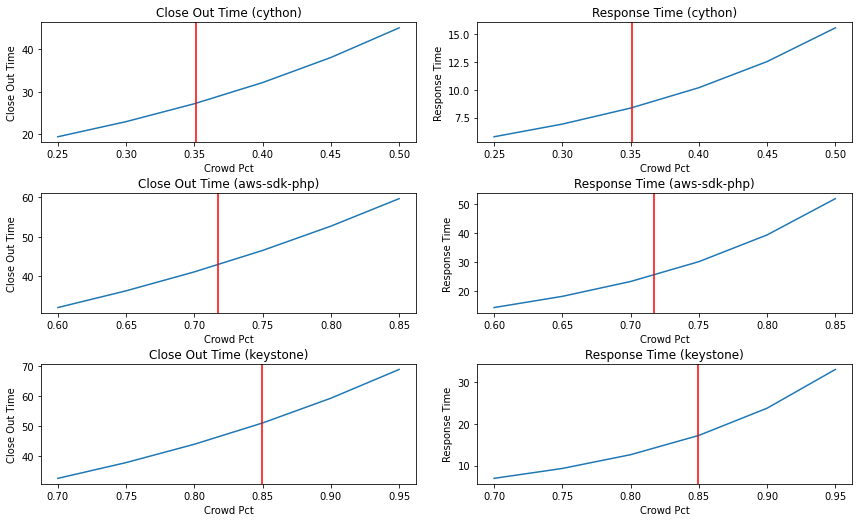

In [13]:
measure1 = 'close_out_time'
measure2 = 'response_time'

label1 = measure1.title().replace('_', ' ')
label2 = measure2.title().replace('_', ' ')

packages = [('cython', 'cython'),
            #('derive4j', 'derive4j'),
            ('aws', 'aws-sdk-php'),
            ('keystonejs', 'keystone')]
            #('randomizedtesting', 'randomizedtesting')]



fig, subplots = plt.subplots(3,2)
fig.set_figheight(7)
fig.set_figwidth(12)
fig.tight_layout(h_pad=3, w_pad=3)
    
for i, (ax1, ax2) in enumerate(subplots):
    organization, package = packages[i]    
    
    plot_data = data_by_crowd_pct[(data_by_crowd_pct['package'] == package) &
                                   (data_by_crowd_pct['organization'] == organization)]

    crowd_pct_actual = list(plot_data['crowd_pct_actual'])[0]

    ax1.plot(plot_data['crowd_pct'], plot_data[f'p_{measure1}'])
    ax1.set_title(f'{label1} ({package})')
    ax1.set(xlabel='Crowd Pct', ylabel=f'{label1}')
    ax1.axvline(x=crowd_pct_actual, color='red')

    ax2.plot(plot_data['crowd_pct'], plot_data[f'p_{measure2}'])
    ax2.set_title(f'{label2} ({package})')
    ax2.set(xlabel='Crowd Pct', ylabel=f'{label2}')
    ax2.axvline(x=crowd_pct_actual, color='red')

[Text(0.5, 86.9999999999999, 'Total Requirements Over Project Age (Years)'),
 Text(564.6704545454544, 0.5, 'Average Time to Close Out\na Requirement (Days)')]

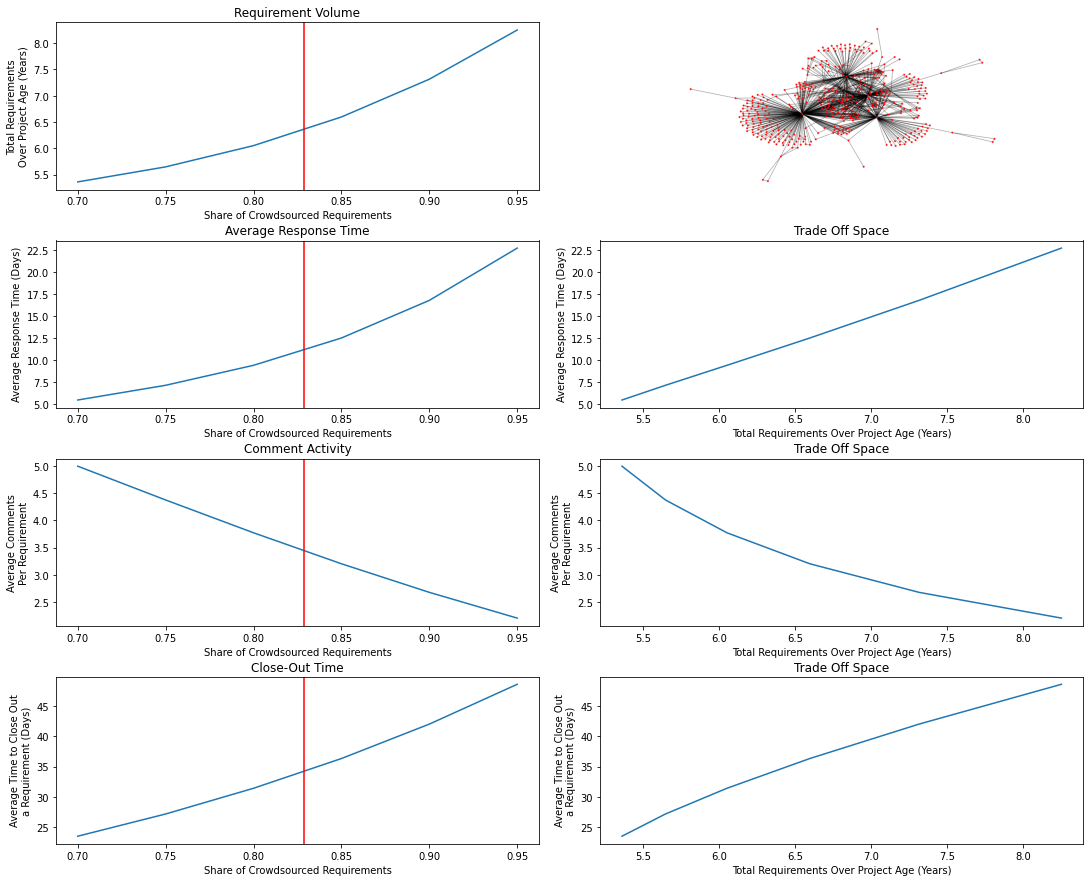

In [14]:
package = organization = 'Leaflet'

measure1 = 'issue_volume'
measure2 = 'response_time'
measure3 = 'avg_comments'
measure4 = 'close_out_time'

plot_data = data_by_crowd_pct[(data_by_crowd_pct['package'] == package) &
   (data_by_crowd_pct['organization'] == organization)]

fig, ((ax11, ax12), (ax21, ax22), (ax31, ax32), (ax41, ax42)) = plt.subplots(4,2)
fig.set_figheight(12)
fig.set_figwidth(15)
fig.tight_layout(h_pad=3, w_pad=3)

label1 = 'Total Requirements Over Project Age (Years)'
label2 = 'Average Response Time (Days)'
label3 = 'Average Comments\nPer Requirement'
label4 = 'Average Time to Close Out\na Requirement (Days)'

crowd_pct_actual = list(plot_data['crowd_pct_actual'])[0]

ax11.plot(plot_data['crowd_pct'], plot_data[f'p_{measure1}'])
ax11.set_title('Requirement Volume')
ax11.set(xlabel='Share of Crowdsourced Requirements', 
         ylabel='Total Requirements\nOver Project Age (Years)')
ax11.axvline(x=crowd_pct_actual, color='red')

img = mpimg.imread(f'../network_plots/network-{organization}-{package}.png')
ax12.imshow(img)
ax12.axis('off')

ax21.plot(plot_data['crowd_pct'], plot_data[f'p_{measure2}'])
ax21.set_title('Average Response Time')
ax21.set(xlabel='Share of Crowdsourced Requirements', ylabel=f'{label2}')
ax21.axvline(x=crowd_pct_actual, color='red')

ax22.plot(plot_data[f'p_{measure1}'], plot_data[f'p_{measure2}'])
ax22.set_title('Trade Off Space')
ax22.set(xlabel=f'{label1}', ylabel=f'{label2}')

ax31.plot(plot_data['crowd_pct'], plot_data[f'p_{measure3}'])
ax31.set_title('Comment Activity')
ax31.set(xlabel='Share of Crowdsourced Requirements', ylabel=f'{label3}')
ax31.axvline(x=crowd_pct_actual, color='red')

ax32.plot(plot_data[f'p_{measure1}'], plot_data[f'p_{measure3}'])
ax32.set_title('Trade Off Space')
ax32.set(xlabel=f'{label1}', ylabel=f'{label3}')

ax41.plot(plot_data['crowd_pct'], plot_data[f'p_{measure4}'])
ax41.set_title('Close-Out Time')
ax41.set(xlabel='Share of Crowdsourced Requirements', ylabel=f'{label4}')
ax41.axvline(x=crowd_pct_actual, color='red')

ax42.plot(plot_data[f'p_{measure1}'], plot_data[f'p_{measure4}'])
ax42.set_title('Trade Off Space')
ax42.set(xlabel=f'{label1}', ylabel=f'{label4}')